## Import packages

In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import yaml, os, sys, glob
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# location of the scripts
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import find_files as find
aux.params() # graphic parameters


# --- other parameters --- #
# name of the source we are studying
source_name = 'Crab'
# ------------------------ #

path_mc     = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/mc/dl2_MC_mean_{source_name}.h5'
path_mc_tot = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/mc/dl2_MC_merged_{source_name}.h5'
path_merged = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_merged_{source_name}.h5'
path_mean   = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_mean_{source_name}.h5'
path_lst    = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_lst_{source_name}.h5'
path_magic  = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_melibea_{source_name}.h5'

# First the energy analysis
### Reading the data
* **RFS**
* **total dl2**
* **mean_3tel**

In [2]:
# reading the main files
df_mc     =  pd.read_hdf(path_mc,     key='events/parameters')
df_mc_tot =  pd.read_hdf(path_mc_tot, key='events/parameters')
df_merged =  pd.read_hdf(path_merged, key='events/parameters')
df_mean   =  pd.read_hdf(path_mean,   key='events/parameters')
df_lst    =  pd.read_hdf(path_lst,    key='events/parameters')
df_magic  =  pd.read_hdf(path_magic,  key='events/parameters')

print(f'The MC mean dl2 ({sys.getsizeof(df_mc)*1e-9:.1f}Gb) and {len(df_mc)} events:')
display(df_mc.head(5))
print(f'The MC merged dl2 ({sys.getsizeof(df_mc_tot)*1e-9:.1f}Gb) and {len(df_mc_tot)} events:')
display(df_mc_tot.head(5))
print(f'The merged dl2 ({sys.getsizeof(df_merged)*1e-9:.1f}Gb) and {int(len(df_merged)/3)} events:')
display(df_merged.head(5))
print(f'The mean-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_mean)} events:')
display(df_mean.head(5))
print(f'The lst-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_lst)} events:')
display(df_lst.head(5))
print(f'The magic-dl2 ({sys.getsizeof(df_mean)*1e-9:.1f}Gb) and {len(df_magic)} events:')
display(df_magic.head(5))

The MC mean dl2 (0.5Gb) and 5596807 events:


combo_type  multiplicity  true_energy   true_alt     true_az  \
obs_id event_id                                                                 
106    800                2             2     0.055094  46.863731  262.132060   
       6607               3             3     0.334875  46.881773  263.283329   
       7100               2             2     0.124289  46.944013  230.547681   
       7106               1             2     0.124289  46.944013  230.547681   
       7903               3             3     0.435743  47.063377  229.555281   

                 pointing_alt  pointing_az  reco_energy   reco_alt  \
obs_id event_id                                                      
106    800           0.816866     4.585189     0.111790  46.956666   
       6607          0.816867     4.585189     0.321443  46.986317   
       7100          0.816866     4.014345     0.175165  47.011549   
       7106          0.816866     4.014345     0.158375  46.919210   
       7903          0.816867     4.014345     0.307186  47.012726   

                    reco_az  gammaness  
obs_id event_id                         
106    800       262.185878   0.758760  
       6607      263.350864   0.977251  
       7100      230.650666   0.958841  
       7106      230.526357   0.947081  
       7903      229.438544   0.930097

The MC merged dl2 (6.0Gb) and 14526270 events:


tel_id  pointing_alt  pointing_az  n_pixels  n_islands  \
obs_id event_id                                                           
106    800            1      0.816866     4.585189         7          1   
       800            3      0.816866     4.585189         9          1   
       6607           1      0.816866     4.585189        16          1   
       6607           2      0.816866     4.585189        18          1   
       6607           3      0.816866     4.585189        18          1   

                 true_energy   true_alt     true_az  true_disp  true_core_x  \
obs_id event_id                                                               
106    800          0.055094  46.863731  262.132060   0.685833   145.081787   
       800          0.055094  46.863731  262.132060   0.731627   145.081787   
       6607         0.334875  46.881773  263.283329   0.213751    27.330303   
       6607         0.334875  46.881773  263.283329   0.289865    27.330303   
       6607         0.334875  46.881773  263.283329   0.257517    27.330303   

                 true_core_y  true_impact  off_axis  magic_stereo   intensity  \
obs_id event_id                                                                 
106    800        -93.304260   174.582687  0.401368         False  199.855450   
       800        -93.304260   173.081484  0.401368         False   70.758062   
       6607        -9.935828    51.861562  0.398654          True  572.066186   
       6607        -9.935828    59.044294  0.398654          True  217.242338   
       6607        -9.935828    61.817486  0.398654          True  235.072818   

                 skewness  kurtosis         x         y         r         phi  \
obs_id event_id                                                                 
106    800       0.020236  1.625029  0.267560  0.056953  0.273554   12.016779   
       800       0.074926  1.832027  0.093766  0.094431  0.133076   45.202428   
       6607      0.299144  3.808194  0.138055  0.250099  0.285673   61.101302   
       6607     -0.067014  2.376142 -0.065226  0.108009  0.126176  121.127556   
       6607     -0.055011  2.478331 -0.009191  0.198270  0.198483   92.654209   

                   length  length_uncertainty     width  width_uncertainty  \
obs_id event_id                                                              
106    800       0.057087            0.001596  0.013881           0.001029   
       800       0.030694            0.001664  0.018051           0.001427   
       6607      0.044041            0.001543  0.028643           0.000783   
       6607      0.036384            0.001448  0.022154           0.000882   
       6607      0.029974            0.001188  0.025021           0.001012   

                       psi  intercept  deviation      slope  pixels_width_1  \
obs_id event_id                                                               
106    800       47.459362  12.452237   0.290617  -0.517939             0.0   
       800      -86.041003   8.187642   0.208907   7.789383             0.0   
       6607      13.207454  14.154981   0.648384   1.505321             0.0   
       6607      10.532336   9.413662   0.501556   6.446793             0.0   
       6607     -41.822723   9.294282   0.427494  15.202115             0.0   

                 pixels_width_2  intensity_width_1  intensity_width_2  \
obs_id event_id                                                         
106    800                  0.0                0.0                0.0   
       800                  0.0                0.0                0.0   
       6607                 0.0                0.0                0.0   
       6607                 0.0                0.0                0.0   
       6607                 0.0                0.0                0.0   

                 multiplicity  combo_type        alt  alt_uncert          az  \
obs_id event_id                                                                
106    800                  

The merged dl2 (5.0Gb) and 2979565 events:


obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
2923   2054766  1            5093174            2132      2923.0   
                2            5093174            2132      2923.0   
                3            5093174            2132      2923.0   
       2054879  1            5093174            2134      2923.0   
                2            5093174            2134      2923.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
2923   2054766  1          2054766.0  1539.117331  0.159153 -0.199730   
                2          2054766.0   682.101041  0.219247 -0.123636   
                3          2054766.0   830.125000  0.211807 -0.165825   
       2054879  1          2054879.0   222.561295 -0.455197  0.046522   
                2          2054879.0   185.757812  0.322648  0.192534   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
2923   2054766  1       0.255385  -51.450648  0.095864            0.003028   
                2       0.251705  -29.419061  0.100258            0.002468   
                3       0.268999  -38.057629  0.094508            0.003121   
       2054879  1       0.457568  174.164535  0.041649            0.003202   
                2       0.375727   30.825800  0.036762            0.001455   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
2923   2054766  1       0.041476           0.001832  39.938156 -0.450708   
                2       0.039357           0.001128  65.294646 -0.720628   
                3       0.030039           0.000740  80.270400  0.379087   
       2054879  1       0.032359           0.001995 -78.978052 -0.425175   
                2       0.028710           0.001415  24.925432  0.411584   

                        kurtosis     slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                     
2923   2054766  1       2.467139 -7.488149  19.800128                0.0   
                2       2.653032  7.173953  15.740397                0.0   
                3       4.620778 -5.738219  18.871566                0.0   
       2054879  1       2.256291 -2.457408  15.740922                0.0   
                2       2.163804  3.734823  12.596438                0.0   

                        intensity_width_2  pixels_width_1  pixels_width_2  \
obs_id event_id tel_id                                                      
2923   2054766  1                0.000000             0.0        0.000000   
                2                0.000000             0.0        0.000000   
                3                0.000000             0.0        0.000000   
       2054879  1                0.000000             0.0        0.000000   
                2                0.022543             0.0        0.000962   

                        n_pixels  n_islands  pointing_alt  pointing_az  \
obs_id event_id tel_id                                                   
2923   2054766  1             42          1      0.784340     1.508031   
                2             61          1      0.784258     1.508029   
                3             46          2      0.784235     1.508001   
       2054879  1             10          1      0.784341     1.508032   
                2             19          1      0.784258     1.508029   

                           timestamp  time_diff  multiplicity  combo_type  \
obs_id event_id tel_id                                                      
2923   2054766  1       1.605743e+09   0.000020             3           3   
                2       1.605743e+09   0.002003             3           3   
                3       1.605743e+09   0.002003        

The mean-dl2 (0.8Gb) and 2979565 events:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2923   2054766            3             3  1.605743e+09      0.784278   
       2054879            3             3  1.605743e+09      0.784278   
       2054932            3             3  1.605743e+09      0.784279   
       2055078            3             3  1.605743e+09      0.784279   
       2055274            3             3  1.605743e+09      0.784281   

                 pointing_az  reco_energy   reco_alt    reco_az  gammaness  \
obs_id event_id                                                              
2923   2054766      1.508020     1.043925  45.828519  86.617489   0.486476   
       2054879      1.508021     0.343145  44.369272  86.108064   0.010833   
       2054932      1.508021     0.331730  43.793342  85.654745   0.567683   
       2055078      1.508021     7.284849  44.127087  89.579022   0.022222   
       2055274      1.508022     1.527714  44.070045  87.364394   0.419333   

                 pointing_ra  pointing_dec    reco_ra   reco_dec  \
obs_id event_id                                                    
2923   2054766     83.966939     22.246320  83.000934  22.391517   
       2054879     83.966939     22.246321  84.619623  22.261177   
       2054932     83.966939     22.246322  85.322760  22.382477   
       2055078     83.966940     22.246323  83.950691  19.842418   
       2055274     83.966940     22.246324  84.601973  21.312493   

                     total_id  theta2_on  theta2_off1  theta2_off2  \
obs_id event_id                                                      
2923   2054766   2923.2054766   0.485831     1.457949     0.774216   
       2054879   2923.2054879   0.896131     0.132843     0.558414   
       2054932   2923.2054932   2.583116     0.896444     1.747791   
       2055078   2923.2055078   4.800598     7.061302     7.779579   
       2055274   2923.2055274   1.301577     1.437852     2.142712   

                 theta2_off3  theta2_off4  theta2_off5  pointing_zd    reco_zd  
obs_id event_id                                                                 
2923   2054766      0.288728     1.170674     1.656184   -89.215722 -44.171481  
       2054879      0.939765     0.469956     0.088614   -89.215722 -45.630728  
       2054932      2.590600     1.730641     0.887869   -89.215721 -46.206658  
       2055078      6.647519     4.079161     5.211073   -89.215721 -45.872913  
       2055274      2.073632     0.594867     0.663942   -89.215719 -45.929955

The lst-dl2 (0.8Gb) and 2979565 events:


intensity         x         y         r       phi  \
obs_id event_id                                                        
2923   2054766   1539.117331  0.159153 -0.199730  0.255385 -0.897983   
       2054879    222.561295 -0.455197  0.046522  0.457568  3.039745   
       2054932    493.258595 -0.599963 -0.179310  0.626185 -2.851175   
       2055078   5716.545122 -0.133117  0.249002  0.282351  2.061740   
       2055274   1982.416317  0.194891  0.360309  0.409640  1.074966   

                   length     width       psi  time_gradient  intercept  \
obs_id event_id                                                           
2923   2054766   0.196164  0.084872  0.697052      -7.488149  19.800128   
       2054879   0.085226  0.066215 -1.378427      -2.457408  15.740922   
       2054932   0.161016  0.115821 -1.029677      10.961353  15.071617   
       2055078   0.512571  0.160540 -1.413655      12.083996  26.947308   
       2055274   0.319193  0.215267  0.199006      14.399923  16.464350   

                 pointing_alt  pointing_az   dragon_time   delta_t  \
obs_id event_id                                                      
2923   2054766       0.784340     1.508031  1.605743e+09  0.000020   
       2054879       0.784341     1.508032  1.605743e+09  0.000029   
       2054932       0.784341     1.508032  1.605743e+09  0.000047   
       2055078       0.784342     1.508032  1.605743e+09  0.000082   
       2055274       0.784343     1.508032  1.605743e+09  0.000009   

                 reco_energy  reco_alt   reco_az  gammaness  reco_src_x  \
obs_id event_id                                                           
2923   2054766      1.296785  0.802239  1.512487   0.849113    0.501298   
       2054879      0.147946  0.769320  1.501430   0.050762   -0.420268   
       2054932      0.558524  0.766855  1.489840   0.201653   -0.487265   
       2055078      5.329910  0.775219  1.554315   0.006266   -0.240307   
       2055274      3.378833  0.769079  1.519712   0.006773   -0.426417   

                 reco_src_y  reco_disp_norm      total_id    reco_ra  \
obs_id event_id                                                        
2923   2054766     0.086735        0.446235  2923.2054766  82.850277   
       2054879    -0.132808        0.182700  2923.2054879  84.936292   
       2054932    -0.366841        0.218789  2923.2054932  85.247786   
       2055078     0.925506        0.684944  2923.2055078  83.804180   
       2055274     0.235006        0.633818  2923.2055274  84.682111   

                  reco_dec  pointing_ra  pointing_dec  theta2_on  theta2_off1  \
obs_id event_id                                                                 
2923   2054766   22.407492    83.962253     22.246814   0.680898     1.790172   
       2054879   22.222370    83.962253     22.246817   1.500806     0.417679   
       2054932   22.628811    83.962253     22.246818   2.609381     0.794979   
       2055078   20.295665    83.962252     22.246822   2.975666     4.983686   
       2055274   21.507596    83.962251     22.246827   1.204546     1.075200   

                 theta2_off2  theta2_off3  theta2_off4  theta2_off5  \
obs_id event_id                                                       
2923   2054766      1.008564     0.454574     1.463760     2.017778   
       2054879      1.064476     1.605577     0.853051     0.311970   
       2054932      1.523335     2.430204     1.880296     0.973452   
       2055078      5.455453     4.450168     2.501507     3.506693   
       2055274      1.769295     1.833138     0.508808     0.444969   

                 pointing_zd    reco_zd  
obs_id event_id                          
2923   2054766    -89.215660 -89.197761  
       2054879    -89.215659 -89.230680  
       2054932    -89.215659 -89.233145  
       2055078    -89.215658 -89.224781  
       2055274    -89.215657 -89.230921

The magic-dl2 (0.8Gb) and 2979565 events:


intensity_M1  intensity_M2  src_pos_M1_X  src_pos_M1_Y  \
obs_id  event_id                                                           
5093174 2132        682.093750    830.125000    -95.093643    -67.696632   
        2134        185.757812     60.031250    -95.094864    -67.695946   
        2136        210.335938    165.843750    -95.095299    -67.695694   
        2140       1205.257812   1114.429688    -95.096870    -67.694801   
        2141         89.109375    321.953125    -95.099022    -67.693573   

                  src_pos_M2_X  src_pos_M2_Y     imp_par_1  imp_par_1_Az  \
obs_id  event_id                                                           
5093174 2132        -95.007812    -69.127335     -1.000000           NaN   
        2134        -95.007668    -69.127419     -1.000000           NaN   
        2136        -95.007614    -69.127449  10451.465820   -137.226624   
        2140        -95.007416    -69.127563  33079.812500    -39.287201   
        2141        -95.007156    -69.127724  37034.121094    -96.295853   

                     imp_par_2  imp_par_2_Az   st_dirX   st_dirY  reco_energy  \
obs_id  event_id                                                                
5093174 2132         -1.000000           NaN       NaN       NaN    -0.001000   
        2134         -1.000000           NaN       NaN       NaN    -0.001000   
        2136       4024.333984   -102.823845  0.476395  1.154509     0.298624   
        2140      37042.355469    -28.298143 -1.908767  0.630050     8.639783   
        2141      33820.605469    -85.031845 -0.770281  0.842653     1.631842   

                  gammaness   reco_dec    reco_ra  pointing_alt  pointing_az  \
obs_id  event_id                                                               
5093174 2132       0.067190        NaN        NaN     44.933542    86.399671   
        2134       0.000000        NaN        NaN     44.933578    86.399689   
        2136       0.484714  22.311983  85.326090     44.933591    86.399695   
        2140       0.000000  20.234385  83.950481     44.933637    86.399718   
        2141       0.173393  21.239693  84.563913     44.933700    86.399749   

                        h_max   slope_1   slope_2  pointing_ra  pointing_dec  \
obs_id  event_id                                                               
5093174 2132          -1.0000  0.431198  0.169814    83.983333     22.243889   
        2134          -1.0000  1.135765 -1.296749    83.983333     22.243889   
        2136      886068.6250  0.714785 -1.347897    83.983333     22.243889   
        2140      968358.7500 -0.567660 -0.512080    83.983333     22.243889   
        2141      978703.0625  1.497397 -1.392613    83.983333     22.243889   

                     timestamp   delta_t      magic_id  theta2_on  \
obs_id  event_id                                                    
5093174 2132      1.737312e+09  0.002003  5093174.2132        NaN   
        2134      1.737705e+09  0.004651  5093174.2134        NaN   
        2136      1.737845e+09  0.002138  5093174.2136   2.546927   
        2140      1.738355e+09  0.003429  5093174.2140   3.252068   
        2141      1.739049e+09  0.008976  5093174.2141   1.346854   

                  theta2_off1  theta2_off2  theta2_off3  theta2_off4  \
obs_id  event_id                                                       
5093174 2132              NaN          NaN          NaN          NaN   
        2134              NaN          NaN          NaN          NaN   
        2136         0.867888     1.742949     2.581884     1.670621   
        2140         5.145523     5.786773     4.838509     2.607934   
        2141         1.570236     2.293316     2.180585     0.621737   

                  theta2_off5  pointing_zd  
obs_id  event_id                            
5093174 2132              NaN   -45.066458  
        2134              NaN   -45.066422  
        2136         0.831725   -45.066409  
        2140         3.556091   -45.066363  
   

* Extracting alone data of each telescope for merged data

In [3]:
df_T1 = df_merged.query('tel_id == 1', inplace=False)
df_T2 = df_merged.query('tel_id == 2', inplace=False)
df_T3 = df_merged.query('tel_id == 3', inplace=False)

dfmc_T1 = df_mc_tot.query('tel_id == 1', inplace=False)
dfmc_T2 = df_mc_tot.query('tel_id == 2', inplace=False)
dfmc_T3 = df_mc_tot.query('tel_id == 3', inplace=False)

### Computing some of the values to not repeat calculus

In [4]:
# gammanes values for the filters
gammas = [0., 0.1, 0.5, 0.7, 0.85, 0.95, 0.99]

# energy of each dataframe filtered in gammaness
E_mc    = [df_mc.query(   f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_mc_T  = [df_mc.query(   f'gammaness > {g}')['true_energy'].to_numpy() for g in gammas]
E_T1    = [df_T1.query(   f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_T2    = [df_T2.query(   f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_T3    = [df_T3.query(   f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_mean  = [df_mean.query( f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_lst   = [df_lst.query(  f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]
E_magic = [df_magic.query(f'gammaness > {g}')['reco_energy'].to_numpy() for g in gammas]



# now we can filter in gamma but with the threshold given by 3-T stereo analysis with magic-mcp-pipe
dfs_3T      = [df_mean.query(f'gammaness > {g}', inplace=False) for g in gammas]
events_F    = [df['total_id'].to_numpy() for df in dfs_3T]
df_merged_F = [df_merged.query('total_id in @evs') for evs in events_F]
events_F_magic = [np.unique(df['magic_id'].to_numpy()) for df in df_merged_F]

# filtering same events that the 3Tel stereo filtered in gammaness
E_mean_F  = E_mean.copy()
E_T1_F    = [df_T1.query(f'total_id    in @evs')['reco_energy'].to_numpy() for evs in events_F]
E_T2_F    = [df_T2.query(f'total_id    in @evs')['reco_energy'].to_numpy() for evs in events_F]
E_T3_F    = [df_T3.query(f'total_id    in @evs')['reco_energy'].to_numpy() for evs in events_F]
E_lst_F   = [df_lst.query(f'total_id   in @evs')['reco_energy'].to_numpy() for evs in events_F]
E_magic_F = [df_magic.query(f'magic_id in @evs')['reco_energy'].to_numpy() for evs in events_F_magic]


We can also compute ratios between energies

In [60]:
# computing energy ratios
r_LST_lst_mcp       = [E_lst_F[i]  / E_T1_F[i]    for i in range(len(gammas))]
r_3T_LST_mcp_lst    = [E_mean_F[i] / E_lst_F[i]   for i in range(len(gammas))]
r_3T_MAGIC_mcp_mars = [E_mean_F[i] / E_magic_F[i] for i in range(len(gammas))]
r_LST_MAGIC_mcp_mcp = [E_T1_F[i]   / E_T2_F[i]    for i in range(len(gammas))]
r_MAGIC_mcp_mars    = [E_T2_F[i]   / E_magic_F[i] for i in range(len(gammas))]
r_LST_MAGIC_lst_mars = [E_lst_F[i]   / E_magic_F[i] for i in range(len(gammas))]

# computing energy ratios
r_3T_LST = [E_mean_F[i] / E_T1_F[i] for i in range(len(gammas))]
r_3T_M1  = [E_mean_F[i] / E_T2_F[i] for i in range(len(gammas))]
r_3T_M2  = [E_mean_F[i] / E_T3_F[i] for i in range(len(gammas))]
r_M1_M2  = [E_T2_F[i]   / E_T3_F[i] for i in range(len(gammas))]
r_LST_M1 = [E_T1_F[i]   / E_T2_F[i] for i in range(len(gammas))]
r_LST_M2 = [E_T1_F[i]   / E_T3_F[i] for i in range(len(gammas))]

Computing the gammaness-related quantities

In [6]:
# defining a energy scale to filter reco_energy
energies = np.logspace(-2, 2.2, 7)

# energy of each dataframe filtered in reco_energy
G_mc, G_mc_T, G_T1, G_T2, G_T3, G_mean, G_lst, G_magic = [], [], [], [], [], [], [], []
for i in range(len(energies)-1):
    
    mask = f'reco_energy >= {energies[i]} & reco_energy <= {energies[i+1]}'
    G_mc.append(df_mc.query(mask)['gammaness'].to_numpy())
    G_mc_T.append(df_mc_tot.query(mask.replace('reco', 'true'))['gammaness'].to_numpy())
    G_T1.append(df_T1.query(mask)['gammaness'].to_numpy())
    G_T2.append(df_T2.query(mask)['gammaness'].to_numpy())
    G_T3.append(df_T3.query(mask)['gammaness'].to_numpy())
    G_mean.append(df_mean.query(mask)['gammaness'].to_numpy())
    G_lst.append(df_lst.query(mask)['gammaness'].to_numpy())
    G_magic.append(df_magic.query(mask)['gammaness'].to_numpy())

In [7]:
# now we can filter in energy but with the threshold given by 3-T stereo analysis with magic-mcp-pipe
dfs_3T = []
for i in range(len(energies)-1): 
    mask = f'reco_energy >= {energies[i]} & reco_energy <= {energies[i+1]}'
    dfs_3T.append(df_mean.query(mask))
    
events_F    = [df['total_id'].to_numpy() for df in dfs_3T]
df_merged_F = [df_merged.query('total_id in @evs') for evs in events_F]
events_F_magic = [np.unique(df['magic_id'].to_numpy()) for df in df_merged_F]

# filtering same events that the 3Tel stereo filtered in gammaness
G_mean_F  = [df_mean.query(f'total_id  in @evs')['gammaness'].to_numpy() for evs in events_F]
G_T1_F    = [df_T1.query(f'total_id    in @evs')['gammaness'].to_numpy() for evs in events_F]
G_T2_F    = [df_T2.query(f'total_id    in @evs')['gammaness'].to_numpy() for evs in events_F]
G_T3_F    = [df_T3.query(f'total_id    in @evs')['gammaness'].to_numpy() for evs in events_F]
G_lst_F   = [df_lst.query(f'total_id   in @evs')['gammaness'].to_numpy() for evs in events_F]
G_magic_F = [df_magic.query(f'magic_id in @evs')['gammaness'].to_numpy() for evs in events_F_magic]

Intensity related quantities

In [8]:
# energy of each dataframe filtered in gammaness
I_mcT1  = [dfmc_T1.query( f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_mcT2  = [dfmc_T2.query( f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_mcT3  = [dfmc_T3.query( f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_T1    = [df_T1.query(   f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_T2    = [df_T2.query(   f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_T3    = [df_T3.query(   f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_lst   = [df_lst.query(  f'gammaness > {g}')['intensity'].to_numpy()    for g in gammas]
I_magic = [df_magic.query(f'gammaness > {g}')['intensity_M1'].to_numpy() for g in gammas]


## Energy distributions for all data types

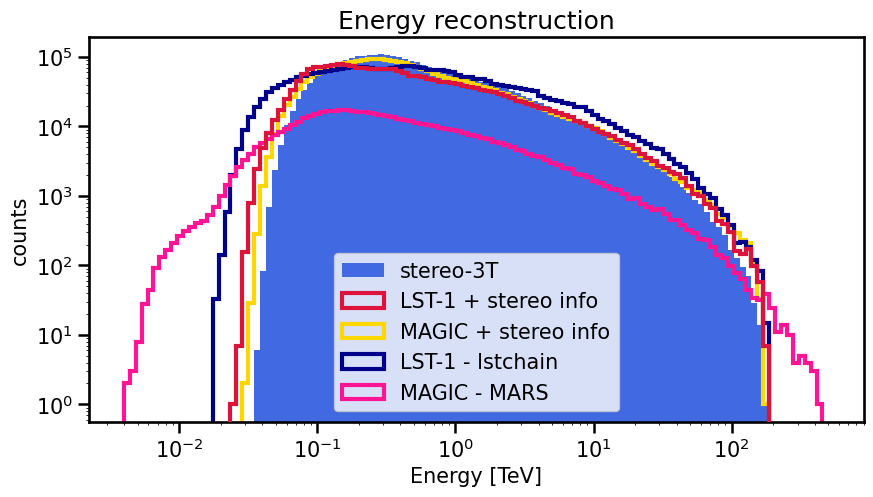

In [9]:
# binning
bins = np.logspace(-2.4, 2.7, 120)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Energy reconstruction')

kw = dict(lw=3, density=False, histtype='step')

ax.hist(E_mean[0], bins, histtype='stepfilled', color='royalblue', label='stereo-3T', density=False, zorder=-1)

ax.hist(E_T1[0], bins,  color='crimson', label='LST-1 + stereo info', zorder=10, **kw)

ax.hist(E_T2[0], bins,  color='gold', label='MAGIC + stereo info', **kw)

ax.hist(E_lst[0], bins, color='darkblue', label='LST-1 - lstchain', **kw)

ax.hist(E_magic[0], bins, color='deeppink', label='MAGIC - MARS', **kw)

# ax.hist(E_mc[0][:len(E_mean[0])], bins, color='darkorange', label='MC data', zorder=0, **kw)

ax.set_xlabel('Energy [TeV]')
ax.set_ylabel('counts')
ax.legend(loc=8)
plt.loglog()
plt.show()

## Energy reconstruction for the `3T` stereo

Applying cuts in gammaness:

Gammaness > 0.0:	 2979565 events	 (100.00%)
Gammaness > 0.1:	 1063237 events	 (35.68%)
Gammaness > 0.5:	 353490 events	 (11.86%)
Gammaness > 0.7:	 185357 events	 (6.22%)
Gammaness > 0.85:	 89662 events	 (3.01%)
Gammaness > 0.95:	 18158 events	 (0.61%)
Gammaness > 0.99:	 935 events	 (0.03%)


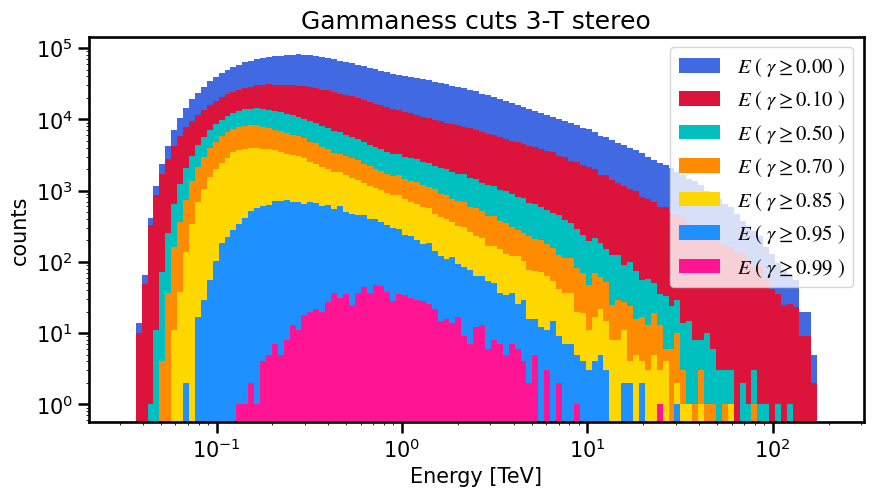

In [10]:
bins = np.logspace(-1.5, 2.3, 120)

print(f'Applying cuts in gammaness:\n')
for g in gammas:
    tmp = df_mean.query(f'gammaness >= {g}', inplace=False)
    print(f'Gammaness > {g}:\t {len(tmp)} events\t ({len(tmp)/len(df_mean)*100:.2f}%)')
    
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Gammaness cuts 3-T stereo')

c = ['royalblue', 'crimson', 'c', 'darkorange', 'gold', 'dodgerblue', 'deeppink']
for i in range(len(E_mean)):
    ax.hist(E_mean[i], bins, color=c[i], alpha=1, histtype='stepfilled', 
            label=f'$E\ (\ \gamma\geq{gammas[i]:.2f}\ )$')

ax.set_xlabel('Energy [TeV]')
ax.set_ylabel('counts')
ax.legend(loc=1)
plt.loglog()
plt.show()

Applying cuts in gammaness:

Gammaness > 0.0:	 5596807 events	 (100.00%)
Gammaness > 0.1:	 5576808 events	 (99.64%)
Gammaness > 0.5:	 5491111 events	 (98.11%)
Gammaness > 0.7:	 5321490 events	 (95.08%)
Gammaness > 0.85:	 4764034 events	 (85.12%)
Gammaness > 0.95:	 2860007 events	 (51.10%)
Gammaness > 0.99:	 666233 events	 (11.90%)


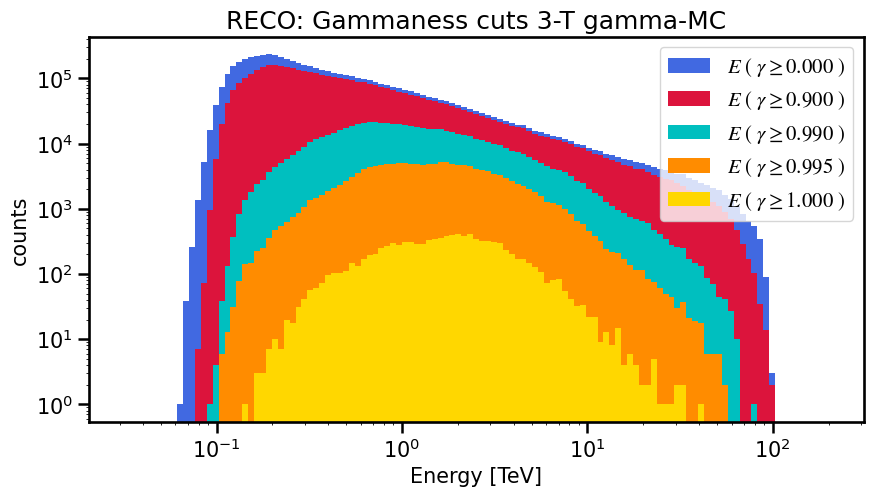

In [11]:
bins = np.logspace(-1.5, 2.3, 120)

print(f'Applying cuts in gammaness:\n')
for g in gammas:
    tmp = df_mc.query(f'gammaness >= {g}', inplace=False)
    print(f'Gammaness > {g}:\t {len(tmp)} events\t ({len(tmp)/len(df_mc)*100:.2f}%)')
    
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'RECO: Gammaness cuts 3-T gamma-MC')

c = ['royalblue', 'crimson', 'c', 'darkorange', 'gold', 'dodgerblue', 'deeppink']
gg = [0, 0.9, 0.99, 0.995, 1]
for i in range(len(gg)):
    ax.hist(df_mc.query(f'gammaness >= {gg[i]}')['reco_energy'].to_numpy(),
            bins, color=c[i], alpha=1, histtype='stepfilled', 
            label=f'$E\ (\ \gamma\geq{gg[i]:.3f}\ )$')

ax.set_xlabel('Energy [TeV]')
ax.set_ylabel('counts')
ax.legend(loc=1)
plt.loglog()
plt.show()

Applying cuts in gammaness:

Gammaness > 0.0:	 5596807 events	 (100.00%)
Gammaness > 0.1:	 5576808 events	 (99.64%)
Gammaness > 0.5:	 5491111 events	 (98.11%)
Gammaness > 0.7:	 5321490 events	 (95.08%)
Gammaness > 0.85:	 4764034 events	 (85.12%)
Gammaness > 0.95:	 2860007 events	 (51.10%)
Gammaness > 0.99:	 666233 events	 (11.90%)


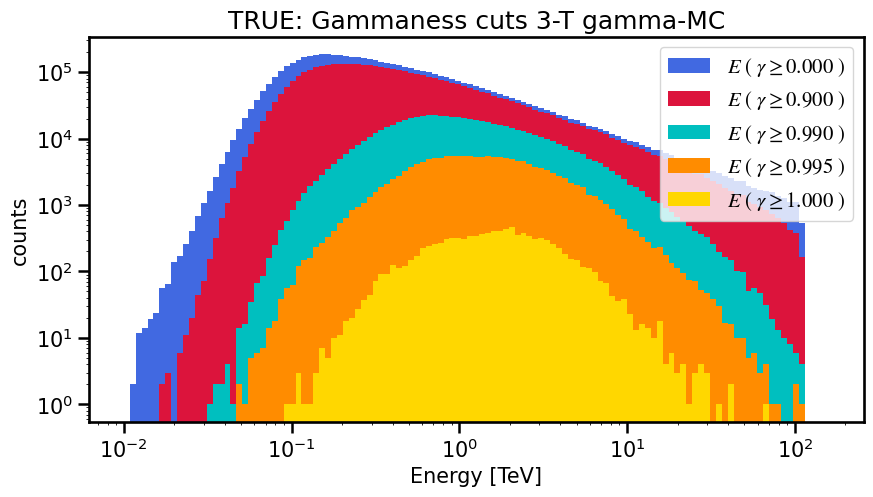

In [12]:
bins = np.logspace(-2, 2.2, 120)

print(f'Applying cuts in gammaness:\n')
for g in gammas:
    tmp = df_mc.query(f'gammaness >= {g}', inplace=False)
    print(f'Gammaness > {g}:\t {len(tmp)} events\t ({len(tmp)/len(df_mc)*100:.2f}%)')
    
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'TRUE: Gammaness cuts 3-T gamma-MC')

c = ['royalblue', 'crimson', 'c', 'darkorange', 'gold', 'dodgerblue', 'deeppink']
gg = [0, 0.9, 0.99, 0.995, 1]
for i in range(len(gg)):
    ax.hist(df_mc.query(f'gammaness >= {gg[i]}')['true_energy'].to_numpy(),
            bins, color=c[i], alpha=1, histtype='stepfilled', 
            label=f'$E\ (\ \gamma\geq{gg[i]:.3f}\ )$')

ax.set_xlabel('Energy [TeV]')
ax.set_ylabel('counts')
ax.legend(loc=1)
plt.loglog()
plt.show()

## All data types with gammaness cuts

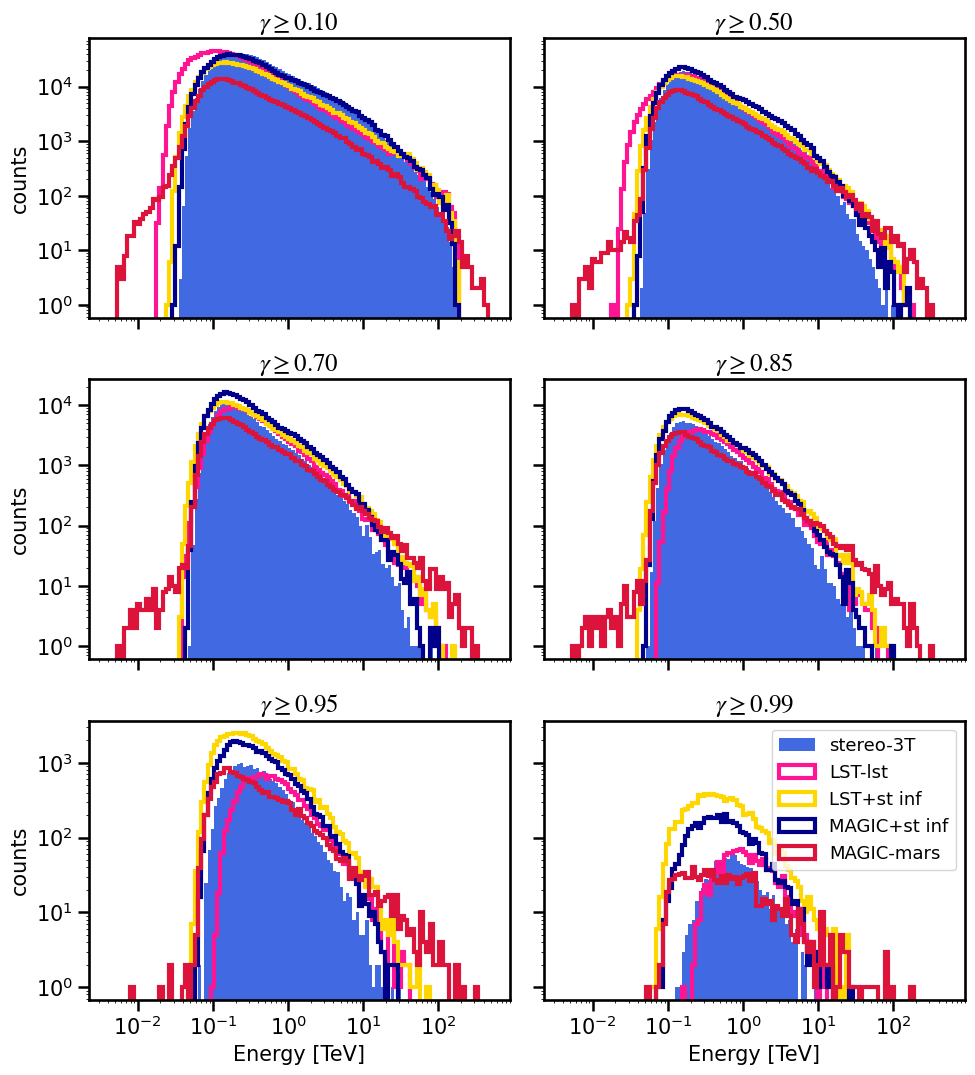

In [13]:
bins = np.logspace(-2.4, 2.7, 120)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,11), sharex=True, sharey='row')

axs = [ax1, ax2, ax3, ax4, ax5, ax6] 
for i in range(len(gammas)-1):
    axs[i].set_title(f'$\gamma \geq {gammas[i+1]:.2f}$')
    axs[i].hist(E_mean[i+1], bins, color='royalblue', alpha=1, histtype='stepfilled', label='stereo-3T')
    axs[i].hist(E_lst[i+1], bins, histtype='step',alpha=1, lw=3, color='deeppink', label='LST-lst')
    axs[i].hist(E_T1[i+1], bins, histtype='step', lw=3, color='gold', label='LST+st inf')
    axs[i].hist(E_T2[i+1], bins, alpha=1, color='darkblue', histtype='step', lw=3, label='MAGIC+st inf')
    axs[i].hist(E_magic[i+1], bins, alpha=1, color='crimson', histtype='step', lw=3, label='MAGIC-mars')
#     axs[i].hist(E_mc[i+1], bins, alpha=1, color='darkorange', histtype='step', lw=3, label='MC data')

ax5.set_xlabel('Energy [TeV]')
ax6.set_xlabel('Energy [TeV]')
ax1.set_ylabel('counts')
ax3.set_ylabel('counts')
ax5.set_ylabel('counts')
ax6.legend(loc=1, fontsize=13)
for ax in axs:
    ax.loglog()
fig.tight_layout()
plt.show()

## Energy comparison between datasets no gamma-cut

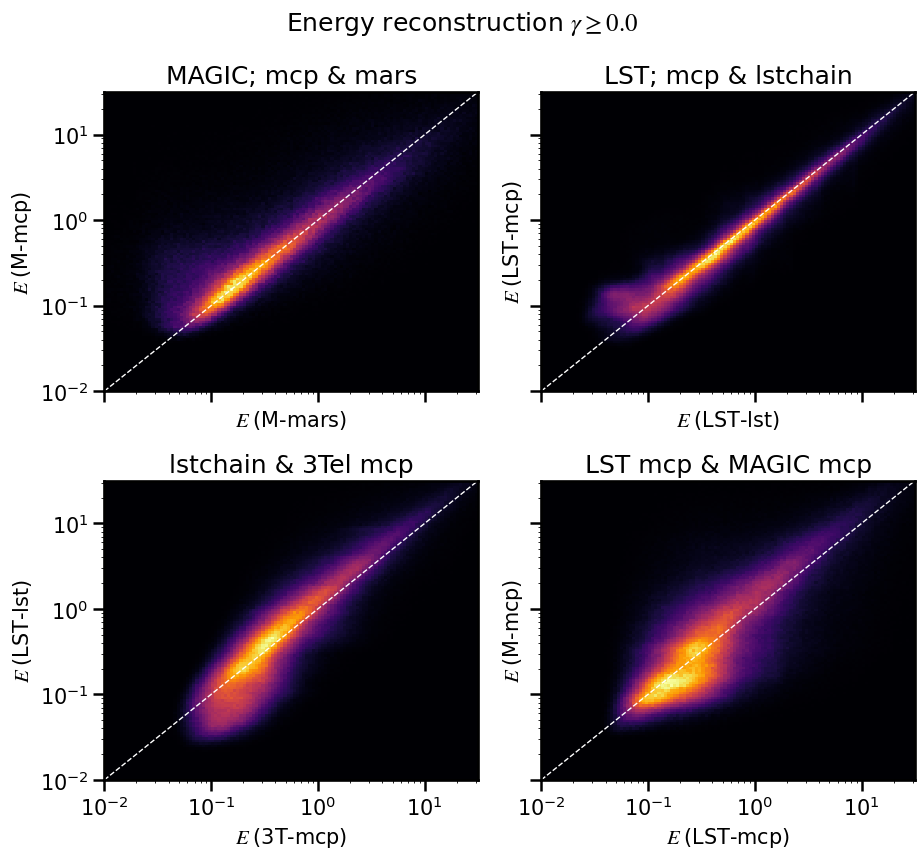

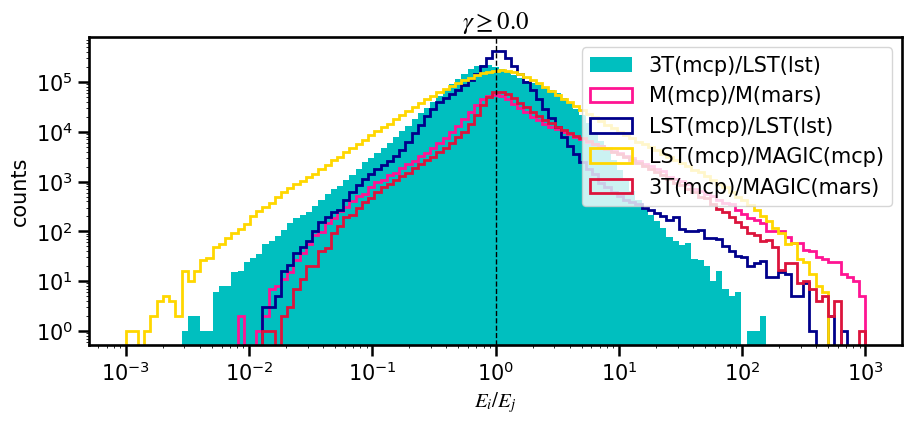

In [14]:
# gammaness index
gi = 0

# --- energy comparison --- #
bins = np.logspace(-2, 1.5, 120)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(9.5,8.8), sharex=True, sharey=True)
fig.suptitle(f'Energy reconstruction $\gamma\geq {gammas[gi]}$')

ax1.hist2d(E_magic_F[gi], E_T2_F[gi],  bins=bins, cmap='inferno')
ax2.hist2d(E_lst_F[gi],   E_T1_F[gi],  bins=bins, cmap='inferno')
ax3.hist2d(E_mean_F[gi],  E_lst_F[gi], bins=bins, cmap='inferno')
ax4.hist2d(E_T2_F[gi],    E_T1_F[gi],  bins=bins, cmap='inferno')

ax1.set_title(f'MAGIC; mcp & mars')
ax2.set_title(f'LST; mcp & lstchain')
ax3.set_title(f'lstchain & 3Tel mcp')
ax4.set_title(f'LST mcp & MAGIC mcp')

ax1.set_xlabel('$E\ $(M-mars)')
ax1.set_ylabel('$E\ $(M-mcp)')
ax2.set_xlabel('$E\ $(LST-lst)')
ax2.set_ylabel('$E\ $(LST-mcp)')
ax3.set_xlabel('$E\ $(3T-mcp)')
ax3.set_ylabel('$E\ $(LST-lst)')
ax4.set_xlabel('$E\ $(LST-mcp)')
ax4.set_ylabel('$E\ $(M-mcp)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.loglog()
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')
fig.tight_layout()
plt.show()

# --- energy ratios --- #
bins = np.logspace(-3,3,120)

fig, ax = plt.subplots(figsize=(10.5,4))
ax.set_title(f'$\gamma\geq {gammas[gi]}$')

ax.hist(r_3T_LST_mcp_lst[gi], bins=bins, label='3T(mcp)/LST(lst)', histtype='stepfilled', color='c')
ax.hist(r_MAGIC_mcp_mars[gi], bins=bins, label='M(mcp)/M(mars)', histtype='step', lw=2, color='deeppink')
ax.hist(r_LST_lst_mcp[gi], bins=bins, label='LST(mcp)/LST(lst)', histtype='step', lw=2, color='darkblue')
ax.hist(r_LST_MAGIC_mcp_mcp[gi], bins=bins, label='LST(mcp)/MAGIC(mcp)', histtype='step', lw=2, color='gold')
ax.hist(r_3T_MAGIC_mcp_mars[gi], bins=bins, label='3T(mcp)/MAGIC(mars)', histtype='step', lw=2, color='crimson')

ax.axvline(1, color='k', lw=1, linestyle='--')

ax.legend()
ax.loglog()
ax.set_xlabel('$E_i/E_j$')
ax.set_ylabel('counts')
plt.show()

## Energy comparison between datasets, gamma-cut

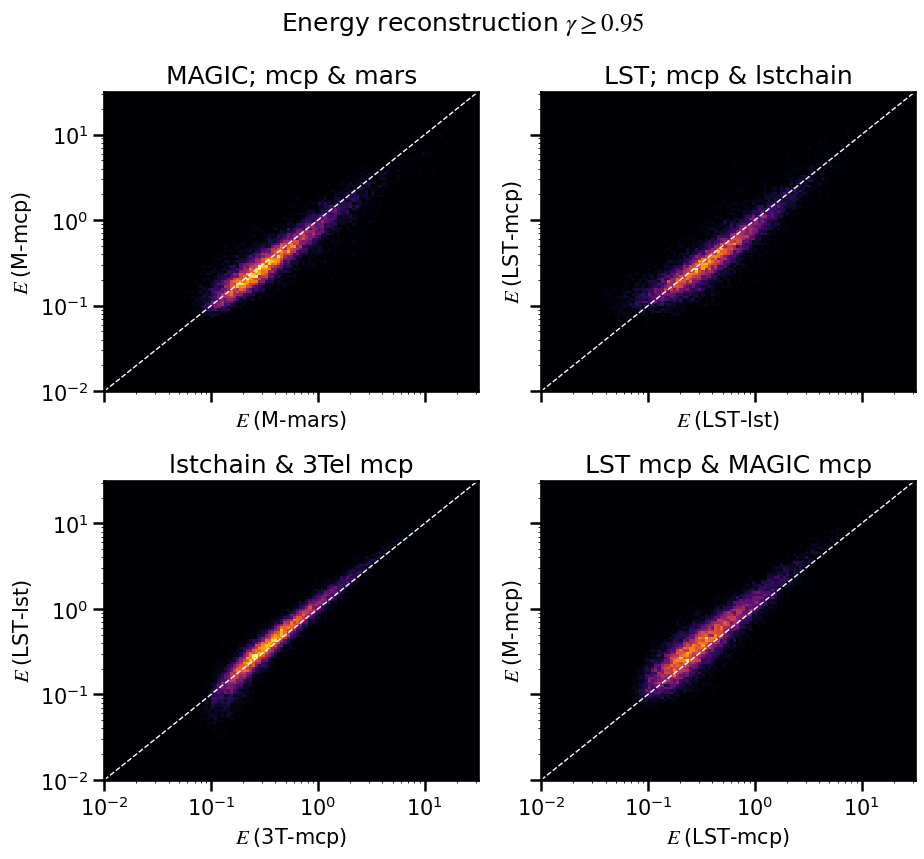

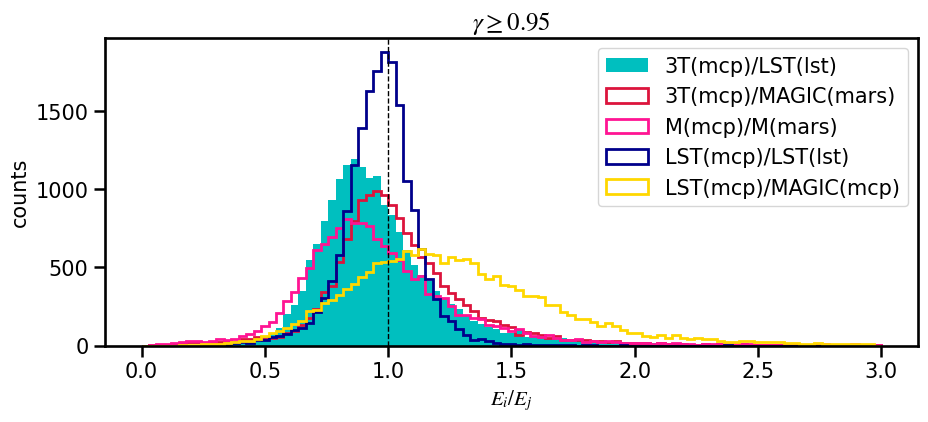

In [37]:
# gammaness index
gi = -2

# --- energy comparison --- #
bins = np.logspace(-2, 1.5, 120)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(9.5,8.8), sharex=True, sharey=True)
fig.suptitle(f'Energy reconstruction $\gamma\geq {gammas[gi]}$')

ax1.hist2d(E_magic_F[gi], E_T2_F[gi],  bins=bins, cmap='inferno')
ax2.hist2d(E_lst_F[gi],   E_magic_F[gi],  bins=bins, cmap='inferno')
ax3.hist2d(E_mean_F[gi],  E_lst_F[gi], bins=bins, cmap='inferno')
ax4.hist2d(E_T2_F[gi],    E_T1_F[gi],  bins=bins, cmap='inferno')

ax1.set_title(f'MAGIC; mcp & mars')
ax2.set_title(f'LST; mcp & lstchain')
ax3.set_title(f'lstchain & 3Tel mcp')
ax4.set_title(f'LST mcp & MAGIC mcp')

ax1.set_xlabel('$E\ $(M-mars)')
ax1.set_ylabel('$E\ $(M-mcp)')
ax2.set_xlabel('$E\ $(LST-lst)')
ax2.set_ylabel('$E\ $(LST-mcp)')
ax3.set_xlabel('$E\ $(3T-mcp)')
ax3.set_ylabel('$E\ $(LST-lst)')
ax4.set_xlabel('$E\ $(LST-mcp)')
ax4.set_ylabel('$E\ $(M-mcp)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.loglog()
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')
fig.tight_layout()
plt.show()

# --- energy ratios --- #
bins = np.linspace(0, 3, 100)

fig, ax = plt.subplots(figsize=(10.5,4))
ax.set_title(f'$\gamma\geq {gammas[gi]}$')

ax.hist(r_3T_LST_mcp_lst[gi], bins=bins, label='3T(mcp)/LST(lst)', histtype='stepfilled', color='c')
ax.hist(r_3T_MAGIC_mcp_mars[gi], bins=bins, label='3T(mcp)/MAGIC(mars)', histtype='step', lw=2, color='crimson')
ax.hist(r_MAGIC_mcp_mars[gi], bins=bins, label='M(mcp)/M(mars)', histtype='step', lw=2, color='deeppink')
ax.hist(r_LST_lst_mcp[gi], bins=bins, label='LST(mcp)/LST(lst)', histtype='step', lw=2, color='darkblue')
ax.hist(r_LST_MAGIC_mcp_mcp[gi], bins=bins, label='LST(mcp)/MAGIC(mcp)', histtype='step', lw=2, color='gold')

ax.axvline(1, color='k', lw=1, linestyle='--')

ax.legend()
ax.set_xlabel('$E_i/E_j$')
ax.set_ylabel('counts')
plt.show()

## Comparison of `stereo-reco` between telescopes using `magic-cta-pipe`

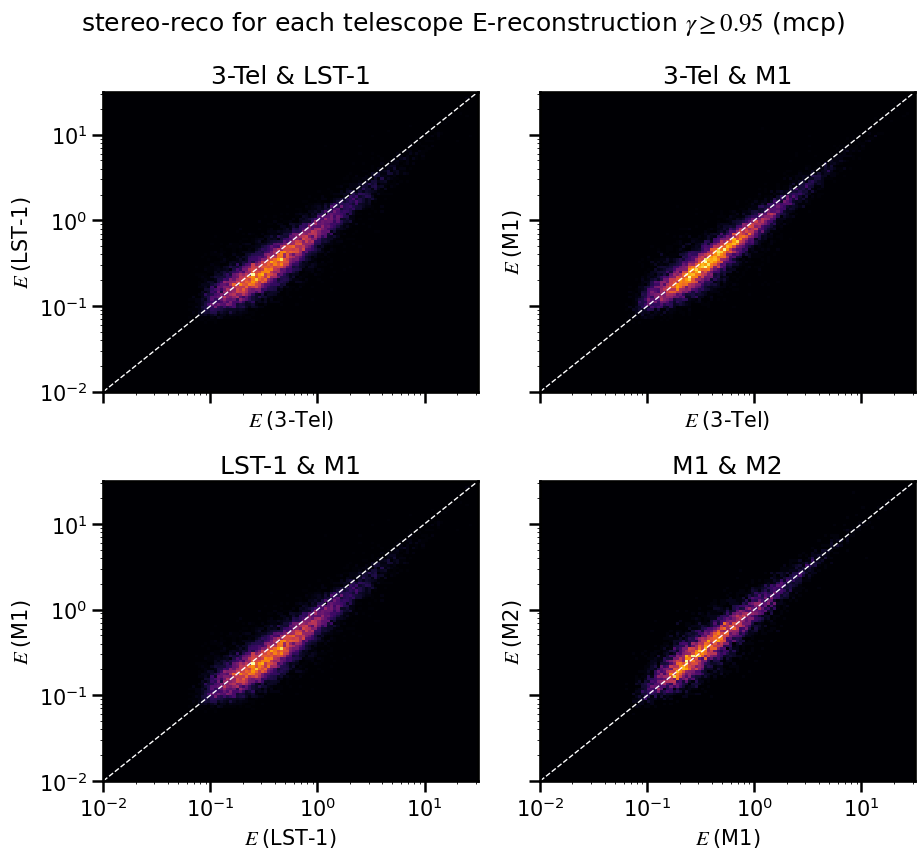


Results of different telescopes:

--> 3T/LST mean=0.921, stdv=0.184, |1-m|=0.079
--> 3T/M1  mean=1.115, stdv=0.229, |1-m|=0.115
--> LST/M1 mean=1.285, stdv=0.475, |1-m|=0.285
--> M1/M2  mean=0.978, stdv=0.345, |1-m|=0.022


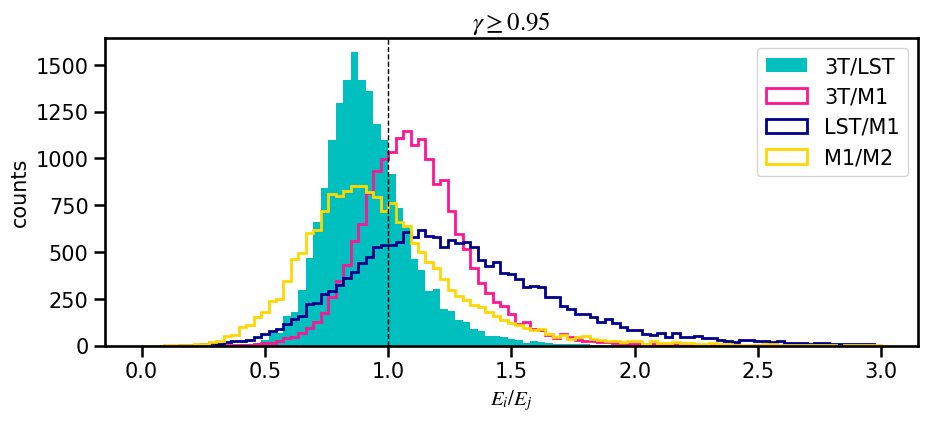

In [34]:
# gammaness index
gi = 5

# --- energy comparison --- #
bins = np.logspace(-2, 1.5, 120)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(9.5,8.8), sharex=True, sharey=True)
fig.suptitle(f'stereo-reco for each telescope E-reconstruction $\gamma\geq {gammas[gi]}$ (mcp)')

ax1.hist2d(E_T1_F[gi], E_T2_F[gi],bins=bins, cmap='inferno')
ax2.hist2d(E_T1_F[gi], E_T3_F[gi],bins=bins, cmap='inferno')
ax3.hist2d(E_T1_F[gi], E_T2_F[gi],bins=bins, cmap='inferno')
ax4.hist2d(E_T2_F[gi][:10000],   E_T3_F[gi][:10000],bins=bins, cmap='inferno')

ax1.set_title(f'3-Tel & LST-1')
ax2.set_title(f'3-Tel & M1')
ax3.set_title(f'LST-1 & M1')
ax4.set_title(f'M1 & M2')

ax1.set_xlabel('$E\ $(3-Tel)')
ax1.set_ylabel('$E\ $(LST-1)')
ax2.set_xlabel('$E\ $(3-Tel)')
ax2.set_ylabel('$E\ $(M1)')
ax3.set_xlabel('$E\ $(LST-1)')
ax3.set_ylabel('$E\ $(M1)')
ax4.set_xlabel('$E\ $(M1)')
ax4.set_ylabel('$E\ $(M2)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.loglog()
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')
fig.tight_layout()
plt.show()


print(f'\nResults of different telescopes:\n')
m, s = np.mean(r_3T_LST[gi]), np.std(r_3T_LST[gi])
print(f'--> 3T/LST mean={m:.3f}, stdv={s:.3f}, |1-m|={abs(1-m):.3f}')
m, s = np.mean(r_3T_M1[gi]), np.std(r_3T_M1[gi])
print(f'--> 3T/M1  mean={m:.3f}, stdv={s:.3f}, |1-m|={abs(1-m):.3f}')
m, s = np.mean(r_LST_M1[gi]), np.std(r_LST_M1[gi])
print(f'--> LST/M1 mean={m:.3f}, stdv={s:.3f}, |1-m|={abs(1-m):.3f}')
m, s = np.mean(r_M1_M2[gi]), np.std(r_M1_M2[gi])
print(f'--> M1/M2  mean={m:.3f}, stdv={s:.3f}, |1-m|={abs(1-m):.3f}')

# --- energy ratios --- #
bins = np.linspace(0, 3, 100)

fig, ax = plt.subplots(figsize=(10.5,4))
ax.set_title(f'$\gamma\geq {gammas[gi]}$')

ax.hist(r_3T_LST[gi], bins=bins, label='3T/LST', histtype='stepfilled', color='c')
ax.hist(r_3T_M1[gi], bins=bins, label='3T/M1', histtype='step', lw=2, color='deeppink')
ax.hist(r_LST_M1[gi], bins=bins, label='LST/M1', histtype='step', lw=2, color='darkblue')
ax.hist(r_M1_M2[gi], bins=bins, label='M1/M2', histtype='step', lw=2, color='gold')

ax.axvline(1, color='k', lw=1, linestyle='--')

ax.legend()
ax.set_xlabel('$E_i/E_j$')
ax.set_ylabel('counts')
plt.show()

### Energy and gammaness

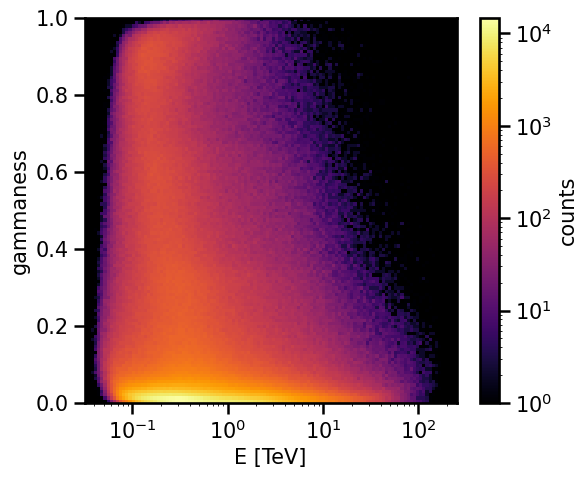

In [17]:
bins = (np.logspace(-1.5, 2.4, 120), np.linspace(0,1,120))

fig, ax = plt.subplots(figsize=(6,5))

counts, _, _, im = ax.hist2d(df_mean['reco_energy'], df_mean['gammaness'], cmap='inferno', bins=bins, norm=colors.LogNorm())
fig.colorbar(im, label='counts')

ax.set_xlabel('E [TeV]')
ax.set_ylabel('gammaness')
ax.set_xscale('log')
ax.set_facecolor('k')
plt.show()

### Monte Carlo energy analysis

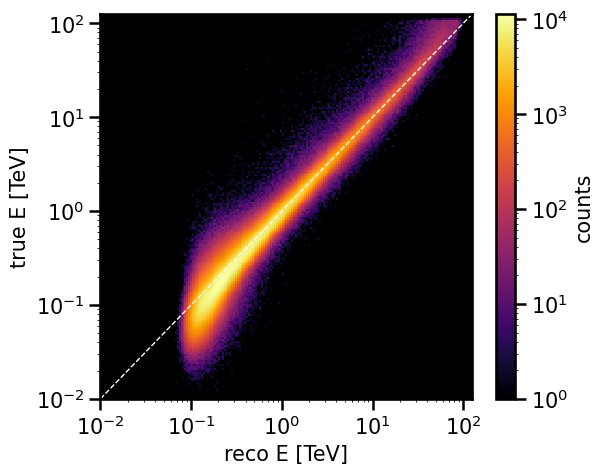

In [18]:
bins = np.logspace(-2, 2.1, 200)

fig, ax = plt.subplots(figsize=(6,5))

counts, _, _, im = ax.hist2d(df_mc['reco_energy'], df_mc['true_energy'], cmap='inferno', bins=bins, norm=colors.LogNorm())
fig.colorbar(im, label='counts')
ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')

ax.set_xlabel('reco E [TeV]')
ax.set_ylabel('true E [TeV]')
ax.loglog()
ax.set_facecolor('k')
plt.show()

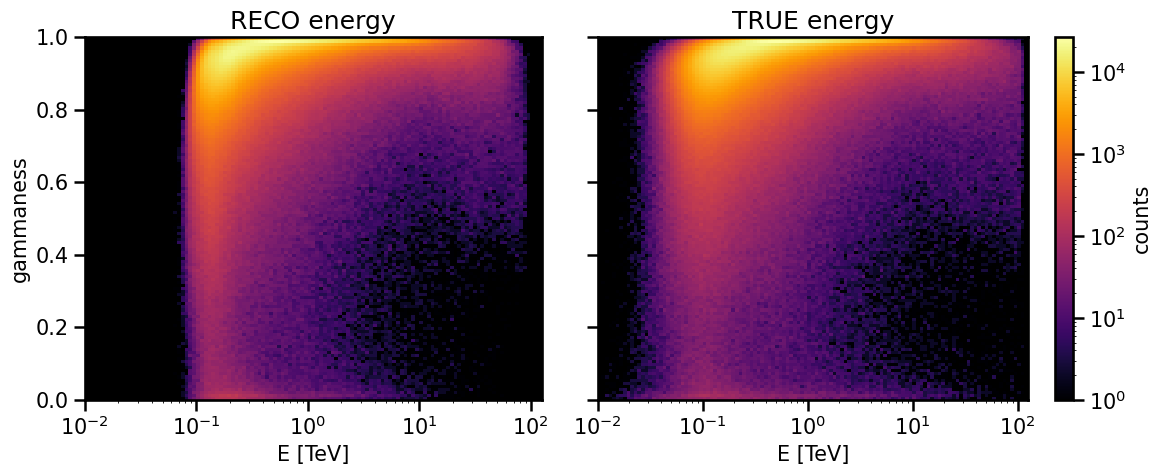

In [19]:
bins = (np.logspace(-2, 2.1, 120), np.linspace(0,1,120))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True, gridspec_kw={'width_ratios': [1.7, 2]})

counts, _, _, im = ax1.hist2d(df_mc['reco_energy'], df_mc['gammaness'], cmap='inferno', bins=bins, norm=colors.LogNorm())
ax1.set_title('RECO energy')

counts, _, _, im = ax2.hist2d(df_mc['true_energy'], df_mc['gammaness'], cmap='inferno', bins=bins, norm=colors.LogNorm())
fig.colorbar(im, label='counts')
ax2.set_title('TRUE energy')

ax1.set_ylabel('gammaness')
for ax in [ax1, ax2]:
    ax.set_xlabel('E [TeV]')
    ax.set_xscale('log')
    ax.set_facecolor('k')
fig.tight_layout()
plt.show()

# Now the gammaness analysis
### All gammaness for all models

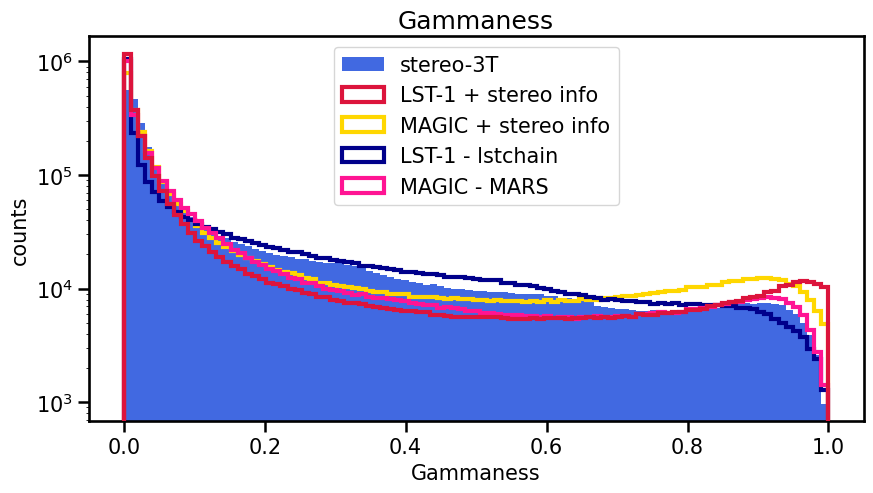

In [20]:
# binning
bins = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Gammaness')

kw = dict(lw=3, density=False, histtype='step')

ax.hist(df_mean['gammaness'], bins, histtype='stepfilled', color='royalblue', label='stereo-3T', density=False, zorder=-1)

ax.hist(df_T1['gammaness'], bins,  color='crimson', label='LST-1 + stereo info', zorder=10, **kw)

ax.hist(df_T2['gammaness'], bins,  color='gold', label='MAGIC + stereo info', **kw)

ax.hist(df_lst['gammaness'], bins, color='darkblue', label='LST-1 - lstchain', **kw)

ax.hist(df_magic['gammaness'], bins, color='deeppink', label='MAGIC - MARS', **kw)

# ax.hist(G_mc[0][:len(E_mean[0])], bins, color='darkorange', label='MC data', zorder=0, **kw)

ax.set_xlabel('Gammaness')
ax.set_ylabel('counts')
ax.legend(loc=9)
ax.set_yscale('log')
plt.show()

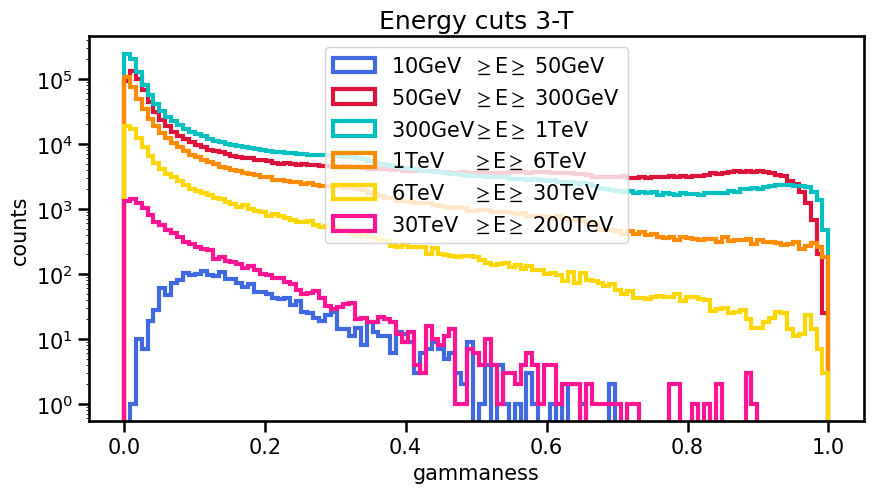

In [21]:
bins = np.linspace(0, 1, 120)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Energy cuts 3-T')

spaces = ['  ','  ','','  $\quad$','  $\quad$','$\quad$']
c = ['royalblue', 'crimson', 'c', 'darkorange', 'gold', 'deeppink']
for i in range(len(energies)-1):
        ax.hist(G_mean[i],
                bins, color=c[i], histtype='step', lw=3,  
                label=f'{energies[i]:.0e}{spaces[i]}$\\geq$E$\\geq$ {energies[i+1]:.0e}'.replace('e-02','0GeV').replace('e-01','00GeV').replace('e+00',
                        'TeV').replace('e+01','0TeV').replace('e+02','00TeV'))

ax.set_xlabel('gammaness')
ax.set_ylabel('counts')
ax.legend(loc=9)
ax.set_yscale('log')
plt.show()

For the MC data

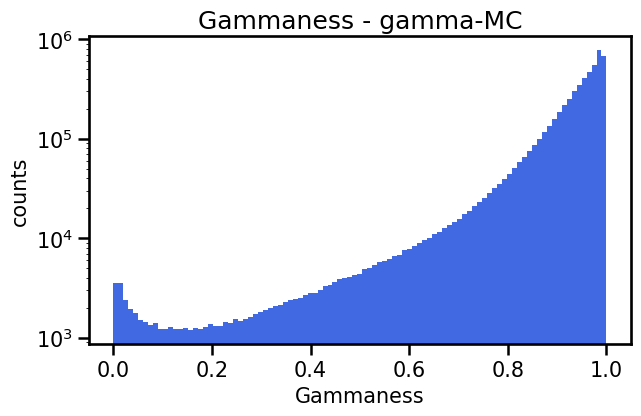

In [22]:
# binning
bins = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(7,4))
ax.set_title(f'Gammaness - gamma-MC')

ax.hist(df_mc['gammaness'], bins, histtype='stepfilled', color='royalblue', zorder=-1)

ax.set_xlabel('Gammaness')
ax.set_ylabel('counts')
ax.set_yscale('log')
plt.show()

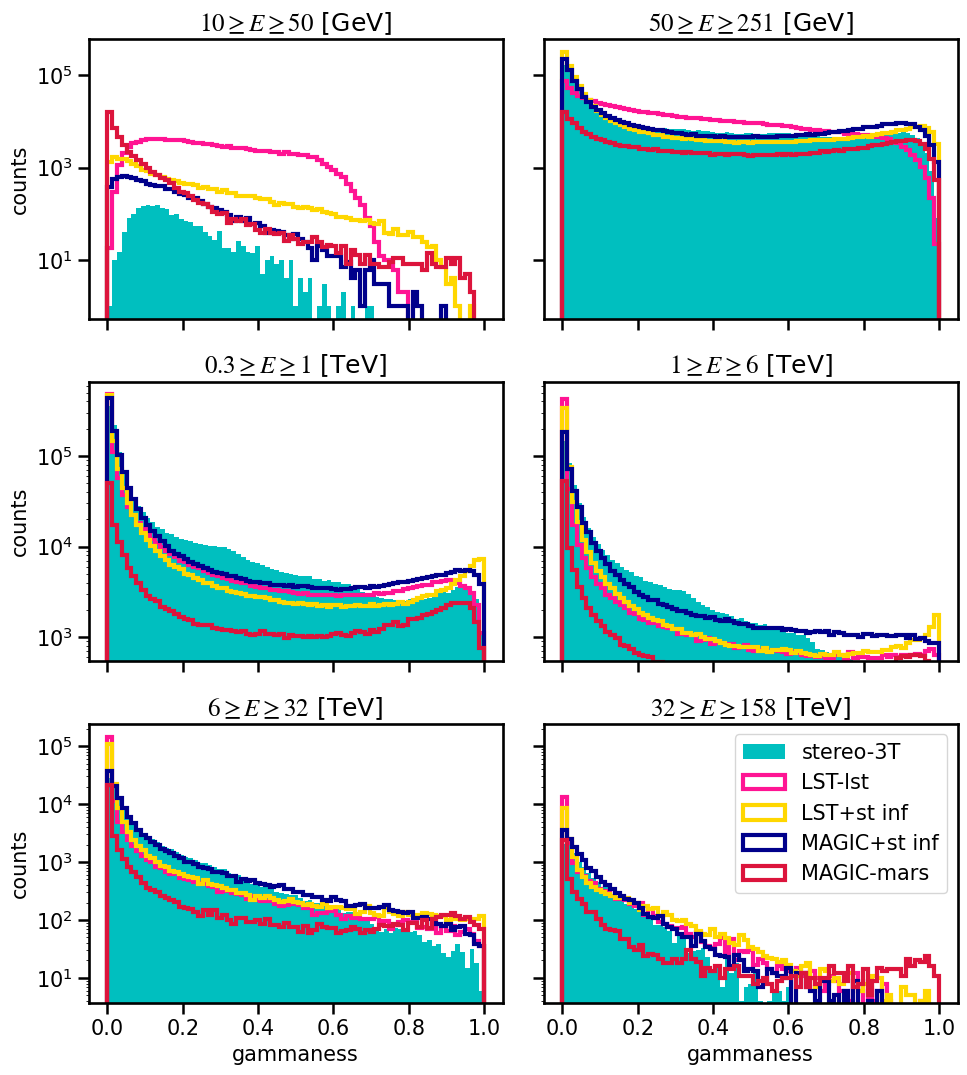

In [23]:
# binning
bins = np.linspace(0, 1, 80)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,11), sharex=True, sharey='row')

axs = [ax1, ax2, ax3, ax4, ax5, ax6] 
for i in range(len(energies)-1):
    axs[i].hist(G_mean[i], bins, color='c', alpha=1, histtype='stepfilled', label='stereo-3T')
    axs[i].hist(G_lst[i], bins, histtype='step',alpha=1, lw=3, color='deeppink', label='LST-lst')
    axs[i].hist(G_T1[i], bins, histtype='step', lw=3, color='gold', label='LST+st inf')
    axs[i].hist(G_T2[i], bins, alpha=1, color='darkblue', histtype='step', lw=3, label='MAGIC+st inf')
    axs[i].hist(G_magic[i], bins, alpha=1, color='crimson', histtype='step', lw=3, label='MAGIC-mars')

axs[0].set_title(f'${energies[0]*1e3:.0f} \geq E \geq {energies[0+1]*1e3:.0f}$ [GeV]')
axs[1].set_title(f'${energies[1]*1e3:.0f} \geq E \geq {energies[1+1]*1e3:.0f}$ [GeV]')
axs[2].set_title(f'${energies[2]:.1f} \geq E \geq {energies[2+1]:.0f}$ [TeV]')
axs[3].set_title(f'${energies[3]:.0f} \geq E \geq {energies[3+1]:.0f}$ [TeV]')
axs[4].set_title(f'${energies[4]:.0f} \geq E \geq {energies[4+1]:.0f}$ [TeV]')
axs[5].set_title(f'${energies[5]:.0f} \geq E \geq {energies[5+1]:.0f}$ [TeV]')

ax5.set_xlabel('gammaness')
ax6.set_xlabel('gammaness')
ax1.set_ylabel('counts')
ax3.set_ylabel('counts')
ax5.set_ylabel('counts')
ax6.legend(loc=1)
for ax in axs:
    ax.set_yscale('log')
fig.tight_layout()
plt.show()

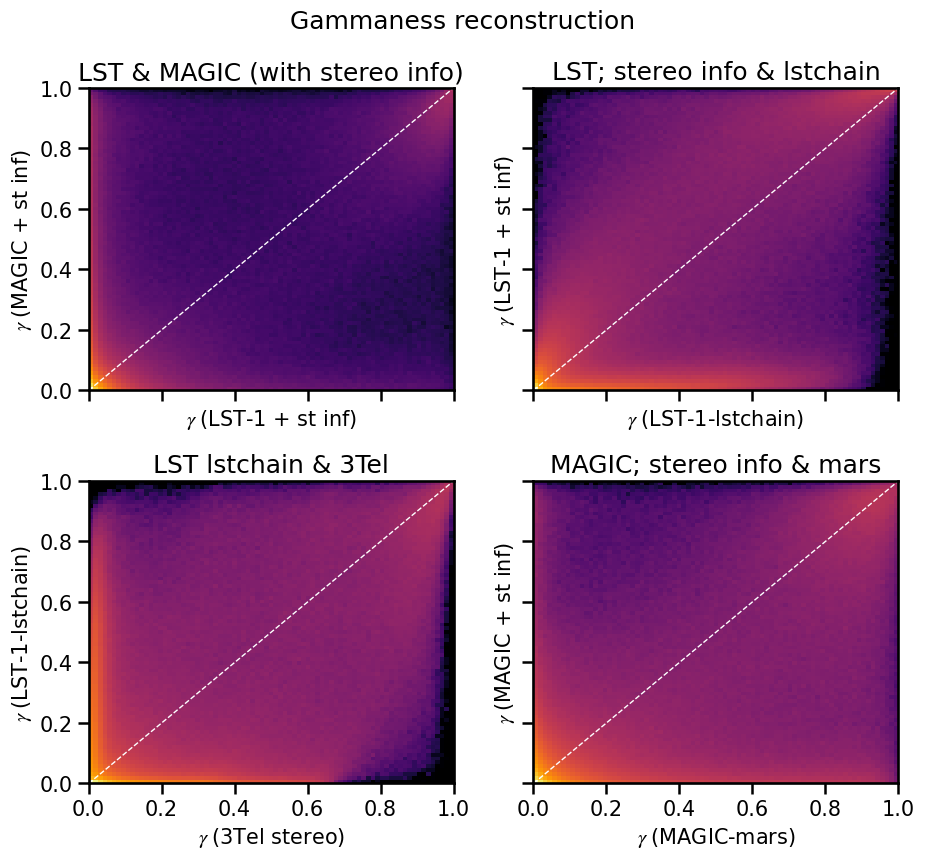

In [24]:
# --- energy comparison --- #
bins = np.linspace(0, 1, 80)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(9.5,8.8), sharex=True, sharey=True)
fig.suptitle(f'Gammaness reconstruction')

ax1.hist2d(df_T1['gammaness'], df_T2['gammaness'],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax2.hist2d(df_lst['gammaness'], df_T1['gammaness'],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax3.hist2d(df_mean['gammaness'], df_lst['gammaness'],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax4.hist2d(df_T2['gammaness'], df_magic['gammaness'],
           bins=bins, cmap='inferno', norm=colors.LogNorm())

ax1.set_title(f'LST & MAGIC (with stereo info)')
ax2.set_title(f'LST; stereo info & lstchain')
ax3.set_title(f'LST lstchain & 3Tel')
ax4.set_title(f'MAGIC; stereo info & mars')

ax1.set_xlabel('$\\gamma\ $(LST-1 + st inf)')
ax1.set_ylabel('$\\gamma\ $(MAGIC + st inf)')
ax2.set_xlabel('$\\gamma\ $(LST-1-lstchain)')
ax2.set_ylabel('$\\gamma\ $(LST-1 + st inf)')
ax3.set_xlabel('$\\gamma\ $(3Tel stereo)')
ax3.set_ylabel('$\\gamma\ $(LST-1-lstchain)')
ax4.set_xlabel('$\\gamma\ $(MAGIC-mars)')
ax4.set_ylabel('$\\gamma\ $(MAGIC + st inf)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')
    ax.set_facecolor('k')
fig.tight_layout()
plt.show()


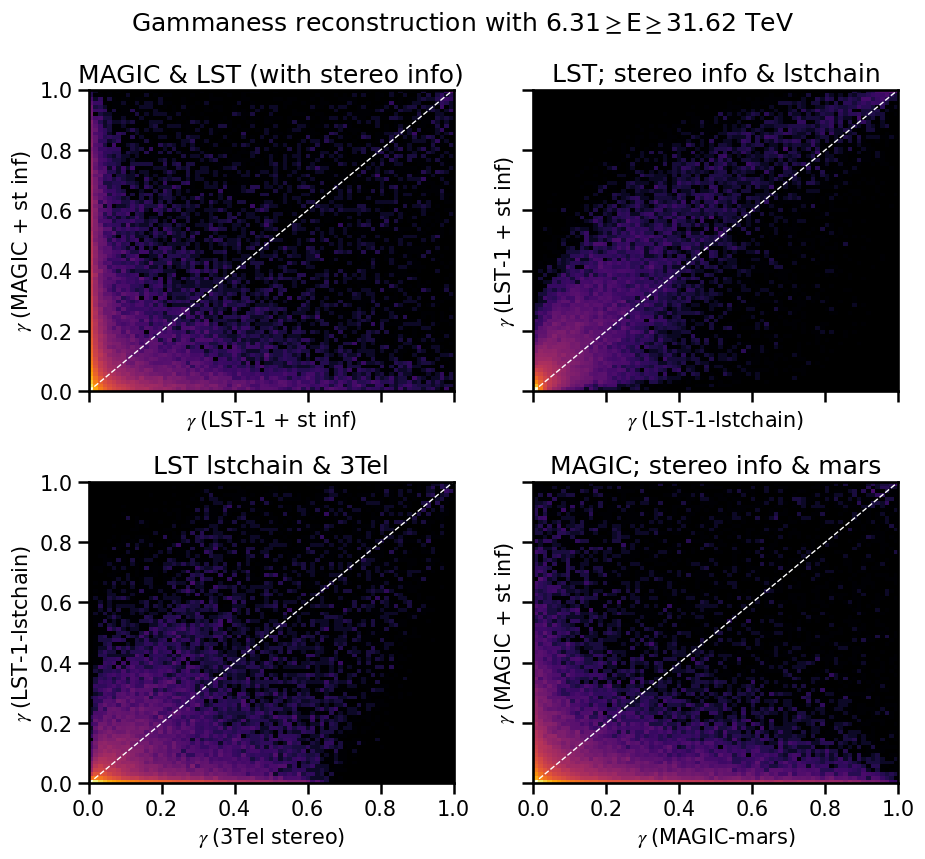

In [25]:
i = 4

# --- energy comparison --- #
bins = np.linspace(0, 1, 80)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(9.5,8.8), sharex=True, sharey=True)
fig.suptitle(f'Gammaness reconstruction with {energies[i]:.2f}$\\geq$E$\\geq${energies[i+1]:.2f} TeV')

ax1.hist2d(G_T1_F[i], G_T2_F[i],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax2.hist2d(G_lst_F[i], G_T1_F[i],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax3.hist2d(G_mean_F[i], G_lst_F[i],
           bins=bins, cmap='inferno', norm=colors.LogNorm())
ax4.hist2d(G_T2_F[i], G_magic_F[i],
           bins=bins, cmap='inferno', norm=colors.LogNorm())

ax1.set_title(f'MAGIC & LST (with stereo info)')
ax2.set_title(f'LST; stereo info & lstchain')
ax3.set_title(f'LST lstchain & 3Tel')
ax4.set_title(f'MAGIC; stereo info & mars')

ax1.set_xlabel('$\\gamma\ $(LST-1 + st inf)')
ax1.set_ylabel('$\\gamma\ $(MAGIC + st inf)')
ax2.set_xlabel('$\\gamma\ $(LST-1-lstchain)')
ax2.set_ylabel('$\\gamma\ $(LST-1 + st inf)')
ax3.set_xlabel('$\\gamma\ $(3Tel stereo)')
ax3.set_ylabel('$\\gamma\ $(LST-1-lstchain)')
ax4.set_xlabel('$\\gamma\ $(MAGIC-mars)')
ax4.set_ylabel('$\\gamma\ $(MAGIC + st inf)')

for ax in [ax1, ax2, ax3, ax4]:
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')
    ax.set_facecolor('k')
fig.tight_layout()
plt.show()


# Intensity

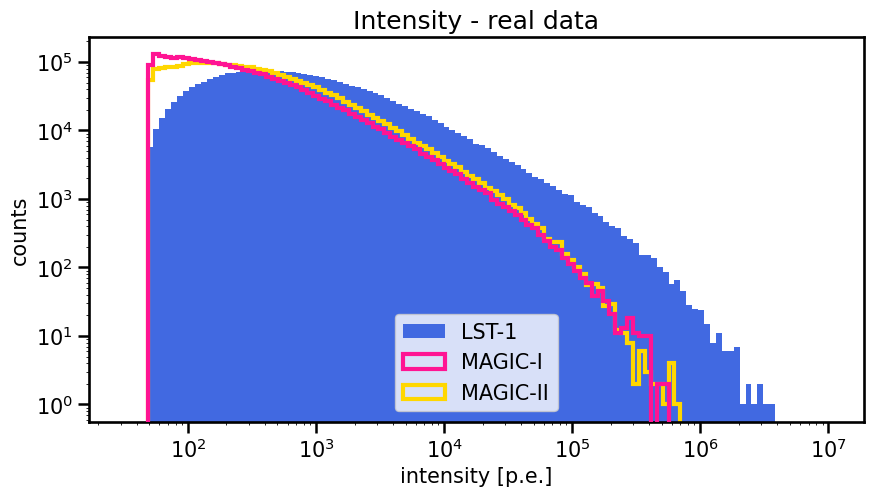

In [26]:
# binning
bins = np.logspace(1.5, 7, 120)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Intensity - real data')

kw = dict(lw=3, density=False, histtype='step')

ax.hist(I_T1[0], bins, histtype='stepfilled', color='royalblue', label='LST-1', density=False, zorder=-1)

ax.hist(I_T2[0], bins,  color='deeppink', label='MAGIC-I', zorder=10, **kw)

ax.hist(I_T3[0], bins,  color='gold', label='MAGIC-II', **kw)


ax.set_xlabel('intensity [p.e.]')
ax.set_ylabel('counts')
ax.legend(loc=8)
plt.loglog()
plt.show()

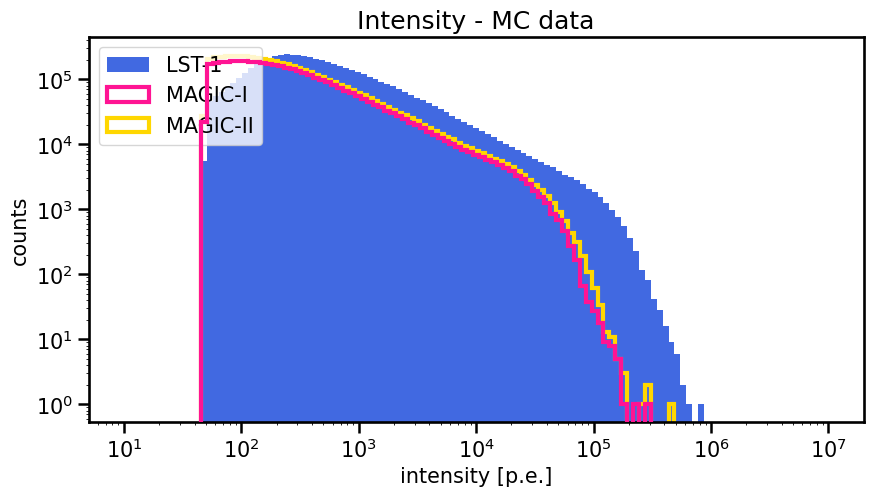

In [27]:
# binning
bins = np.logspace(1, 7, 120)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Intensity - MC data')

kw = dict(lw=3, density=False, histtype='step')

ax.hist(I_mcT1[0], bins, histtype='stepfilled', color='royalblue', label='LST-1', density=False, zorder=-1)

ax.hist(I_mcT2[0], bins,  color='deeppink', label='MAGIC-I', zorder=10, **kw)

ax.hist(I_mcT3[0], bins,  color='gold', label='MAGIC-II', **kw)


ax.set_xlabel('intensity [p.e.]')
ax.set_ylabel('counts')
ax.legend(loc=2)
plt.loglog()
plt.show()

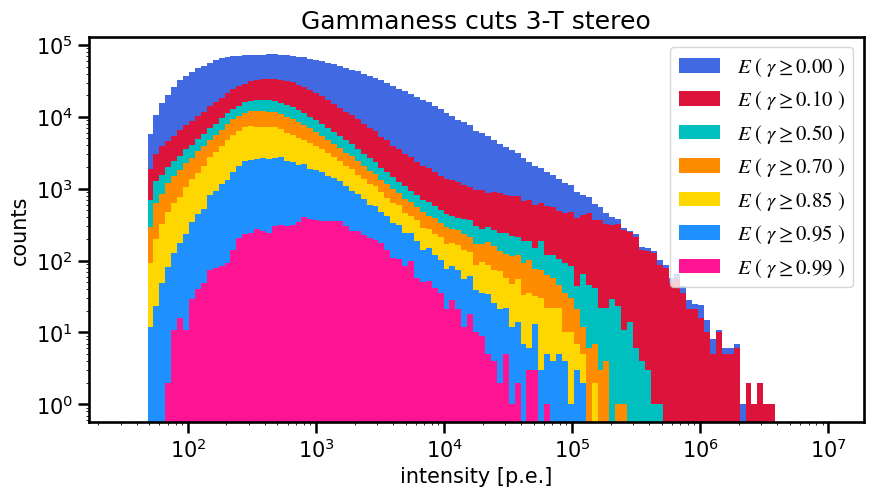

In [28]:
bins = np.logspace(1.5, 7, 120)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'Gammaness cuts 3-T stereo')

c = ['royalblue', 'crimson', 'c', 'darkorange', 'gold', 'dodgerblue', 'deeppink']
for i in range(len(E_mean)):
    ax.hist(I_T1[i], bins, color=c[i], alpha=1, histtype='stepfilled', 
            label=f'$E\ (\ \gamma\geq{gammas[i]:.2f}\ )$')

ax.set_xlabel('intensity [p.e.]')
ax.set_ylabel('counts')
ax.legend(loc=1)
plt.loglog()
plt.show()

# PLOTS THESIS

## Energy and Gammaness distributions overview

In [29]:
# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 200     # resolution of saved images
formatIm = '.pdf'  # format of saved images

t  = df_mean['timestamp'].to_numpy()
dt = np.diff(t)
obs_time = sum(dt[dt<1])

In [30]:
energies = np.logspace(-1.8, 2, 7)

# energy of each dataframe filtered in reco_energy
G_mc, G_mc_T, G_T1, G_T2, G_T3, G_mean, G_lst, G_magic = [], [], [], [], [], [], [], []
for i in range(len(energies)-1):
    
    mask = f'reco_energy >= {energies[i]} & reco_energy <= {energies[i+1]}'
    G_mc.append(df_mc.query(mask)['gammaness'].to_numpy())
    G_mc_T.append(df_mc_tot.query(mask.replace('reco', 'true'))['gammaness'].to_numpy())
    G_T1.append(df_T1.query(mask)['gammaness'].to_numpy())
    G_T2.append(df_T2.query(mask)['gammaness'].to_numpy())
    G_T3.append(df_T3.query(mask)['gammaness'].to_numpy())
    G_mean.append(df_mean.query(mask)['gammaness'].to_numpy())
    G_lst.append(df_lst.query(mask)['gammaness'].to_numpy())
    G_magic.append(df_magic.query(mask)['gammaness'].to_numpy())

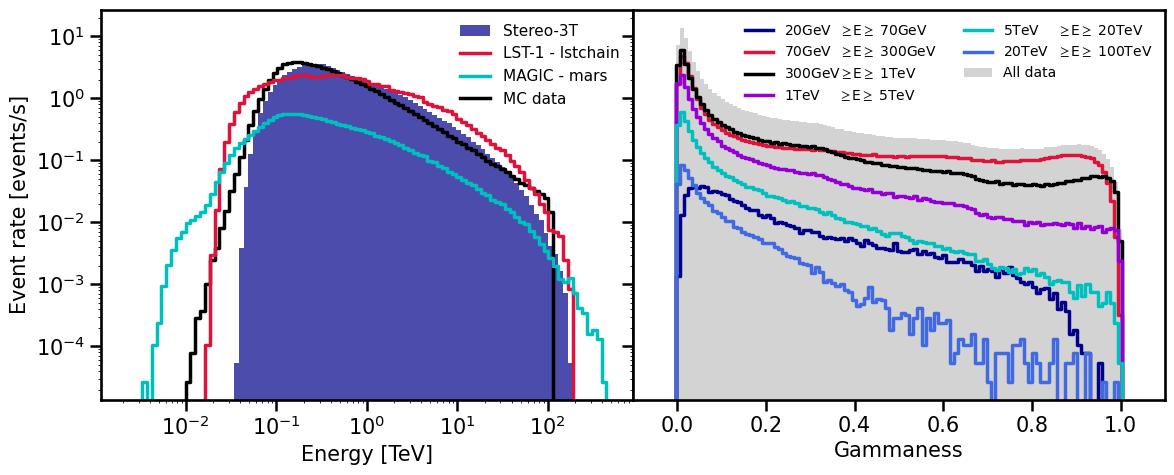

In [103]:
bins   = np.logspace(-2.7, 2.7, 102)
bins_c = (bins[:-1] + bins[1:])/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

kw = dict(lw=2.5,)

hist, _ = np.histogram(E_mean[0], bins=bins)
ax1.fill_between(bins_c, hist/obs_time, step='mid', color='darkblue', label='Stereo-3T', zorder=-1, alpha=0.7, lw=0)
hist, _ = np.histogram(E_lst[0], bins=bins)
ax1.plot(bins_c, hist/obs_time, ds='steps-mid', color='crimson', label='LST-1 - lstchain', **kw)
hist, _ = np.histogram(E_magic[0], bins=bins)
ax1.plot(bins_c, hist/obs_time, ds='steps-mid', color='c', label='MAGIC - mars', **kw)
hist, _ = np.histogram(E_mc_T[0][:len(E_mean[0])], bins=bins)
ax1.plot(bins_c, hist/obs_time, ds='steps-mid', color='k', label='MC data', zorder=0, **kw)


bins = np.linspace(-0.05, 1.05, 120)
bins_c = (bins[:-1] + bins[1:])/2

hist, _ = np.histogram(df_mean['gammaness'], bins=bins)
ax2.fill_between(bins_c, hist/obs_time, color='lightgray', zorder=-10, step='mid', label='All data', alpha=1, lw=0)

spaces = ['  ','  ','','  $\quad$','  $\quad$','$\quad$']
c      = ['darkblue', 'crimson', 'k', 'darkviolet', 'c', 'royalblue']
for i in range(len(energies)-1):
    hist, _ = np.histogram(G_mean[i], bins=bins)
    
    ax2.plot(bins_c, hist/obs_time, color=c[i], lw=2.5, ds='steps-mid',
             label=f'{energies[i]:.0e}{spaces[i]}$\\geq$E$\\geq$ {energies[i+1]:.0e}'.replace('e-02','0GeV').replace('e-01','00GeV').replace('e+00',
                    'TeV').replace('e+01','0TeV').replace('e+02','00TeV'))

ax1.set_xlabel('Energy [TeV]')
ax1.set_ylabel('Event rate [events/s]')
ax2.set_xlabel('Gammaness')
ax1.legend(loc=1, fontsize=11, frameon=False, ncol=1)
ax1.loglog()
ax2.set_yscale('log')
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 3, 4, 5, 6, 0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=1, fontsize=10, frameon=False, ncol=2)

plt.savefig(f'{pltpath}energy-gammaness-distributions{formatIm}', bbox_inches='tight', dpi=dpi)
plt.show()

## Comparisons plots

Energy reconstruction gamma >= 0.95


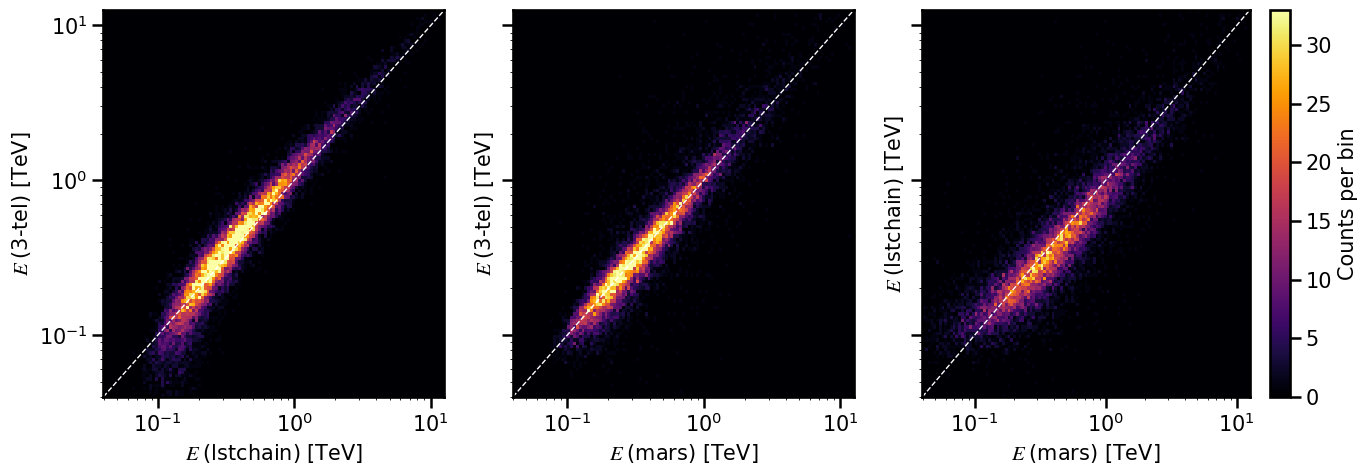

In [52]:
# gammaness index
gi = -2
print(f'Energy reconstruction gamma >= {gammas[gi]}')
cmap = 'inferno'


# --- energy comparison --- #
N = 120
bins = np.logspace(-1.4, 1.1, N)

X, Y = np.meshgrid(bins, bins)

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 1, 1.2]}, sharey=True)

norm = colors.Normalize(vmin=0, vmax=33)
h1, _, _ = np.histogram2d(E_lst_F[gi], E_mean_F[gi],  bins=bins)
c1 = ax1.pcolormesh(X, Y, h1, cmap=cmap, norm=norm)

h2, _, _ = np.histogram2d(E_magic_F[gi], E_mean_F[gi],  bins=bins)
c2 = ax2.pcolormesh(X, Y, h2, cmap=cmap, norm=norm)

h3, _, _ = np.histogram2d(E_magic_F[gi], E_lst_F[gi],  bins=bins)
c3 = ax3.pcolormesh(X, Y, h3, cmap=cmap, norm=norm)
fig.colorbar(c3, ax=ax3, label='Counts per bin')

ax1.set_xlabel('$E\ $(lstchain) [TeV]')
ax1.set_ylabel('$E\ $(3-tel) [TeV]')
ax2.set_ylabel('$E\ $(3-tel) [TeV]')
ax2.set_xlabel('$E\ $(mars) [TeV]')
ax3.set_ylabel('$E\ $(lstchain) [TeV]')
ax3.set_xlabel('$E\ $(mars) [TeV]')

for ax in [ax1, ax2, ax3]:
    ax.loglog()
    ax.plot([min(bins),max(bins)], [min(bins),max(bins)], lw=1 ,ls='--', c='w')

fig.tight_layout()
plt.savefig(f'{pltpath}energy-comparison-1.png', bbox_inches='tight', dpi=dpi)
plt.show()

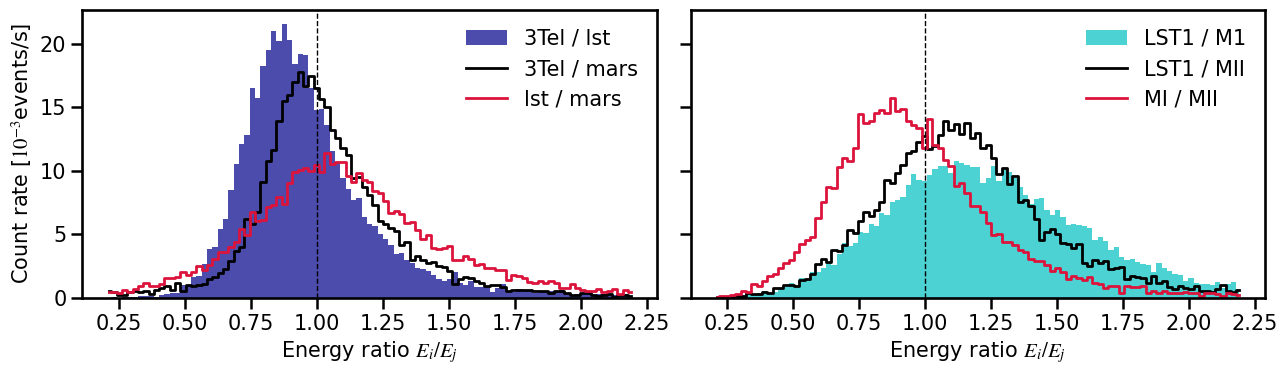

In [102]:
# --- energy ratios --- #
bins = np.linspace(0.2, 2.2, 100)
bins_c = (bins[:-1] + bins[1:])/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), sharey=True)

kw = dict(lw=2.,)

hist, _ = np.histogram(r_3T_LST_mcp_lst[gi], bins=bins)
ax1.fill_between(bins_c, hist/obs_time*1e3, step='mid', color='darkblue', label='3Tel / lst', zorder=-1, alpha=0.7, lw=0)
hist, _ = np.histogram(r_3T_MAGIC_mcp_mars[gi], bins=bins)
ax1.plot(bins_c, hist/obs_time*1e3, ds='steps-mid', color='k', label='3Tel / mars', **kw)
hist, _ = np.histogram(r_LST_MAGIC_lst_mars[gi], bins=bins)
ax1.plot(bins_c, hist/obs_time*1e3, ds='steps-mid', color='crimson', label='lst / mars', **kw)

hist, _ = np.histogram(r_LST_M1[gi], bins=bins)
ax2.fill_between(bins_c, hist/obs_time*1e3, step='mid', color='c', label='LST1 / M1', zorder=-1, alpha=0.7, lw=0)
hist, _ = np.histogram(r_LST_M2[gi], bins=bins)
ax2.plot(bins_c, hist/obs_time*1e3, ds='steps-mid', color='k', label='LST1 / MII', **kw)
hist, _ = np.histogram(r_M1_M2[gi], bins=bins)
ax2.plot(bins_c, hist/obs_time*1e3, ds='steps-mid', color='crimson', label='MI / MII', **kw)



for ax in [ax1, ax2]:
    ax.axvline(1, color='k', lw=1, linestyle='--')
    ax.set_ylim(0)
    ax.legend(frameon=False,)
    ax.set_xlabel('Energy ratio $E_i/E_j$')

ax1.set_ylabel('Count rate [$10^{-3}$events/s]')
# ax.grid()
fig.tight_layout()
plt.savefig(f'{pltpath}energy-comparison-2{formatIm}', bbox_inches='tight', dpi=dpi)
plt.show()

## Big comparison plot